<a href="https://colab.research.google.com/github/Sim0no/Arenas/blob/main/Modelos_Supervisados1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
%matplotlib inline
from IPython.display import Image

#### Damos $X$ and $y$

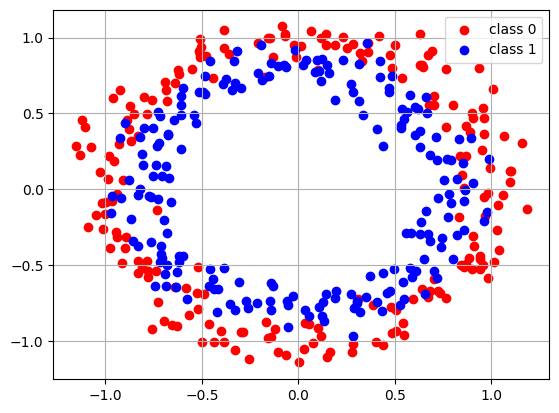

In [2]:
#X,y = make_moons(400, noise=0.1)
X,y = make_circles(400, noise=0.1)

plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red", label="class 0")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue", label="class 1")
plt.legend();
plt.grid();

In [3]:
X[:10]

array([[ 0.14409619, -0.68817237],
       [-0.1324337 ,  0.87343607],
       [-0.75869809, -0.92474673],
       [-0.35505887, -0.75851418],
       [-0.73467507, -0.13713873],
       [-0.87408185,  0.54577785],
       [ 0.65396307, -0.4636405 ],
       [ 0.83259839,  0.33285154],
       [ 1.03731615, -0.10682562],
       [ 0.10401191,  0.7876441 ]])

In [4]:
y[:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

(array([15., 37., 51., 35., 23., 24., 26., 30., 27., 42., 38., 40., 12.]),
 array([-1.15313772, -0.97328766, -0.79343759, -0.61358753, -0.43373747,
        -0.25388741, -0.07403734,  0.10581272,  0.28566278,  0.46551285,
         0.64536291,  0.82521297,  1.00506304,  1.1849131 ]),
 <BarContainer object of 13 artists>)

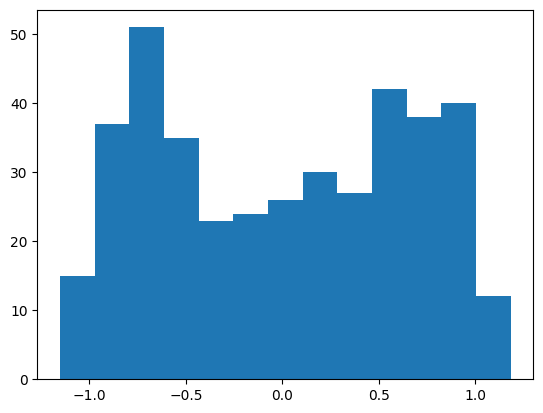

In [6]:
plt.hist(X[:,0], bins=13)

## Regresión logística

In [ ]:
#from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)
lr.score(X,y)

0.875

In [ ]:
preds= lr.predict(X)
preds[:20]

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1],
      dtype=int64)

In [ ]:
y[:20]

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1],
      dtype=int64)

SCORE 0.87


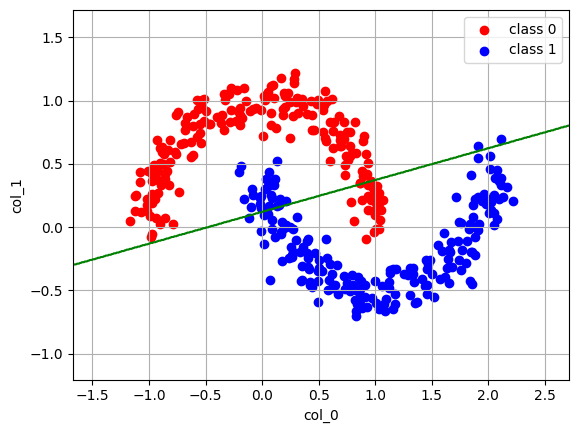

In [ ]:
# Crear una malla de puntos para graficar la línea de decisión
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la línea de decisión de la regresión logística
plt.contour(xx, yy, Z, levels=[0.5], colors='green')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="class 1")
plt.xlabel("col_0"); plt.ylabel("col_1");
plt.legend()
plt.grid()
print ("SCORE %.2f"%lr.score(X,y))

## Arbol de Decisión

In [ ]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X,y)
y_preds = dt.predict(X)
print ("SCORE %.2f"%dt.score(X,y))

SCORE 0.93


SCORE 0.93


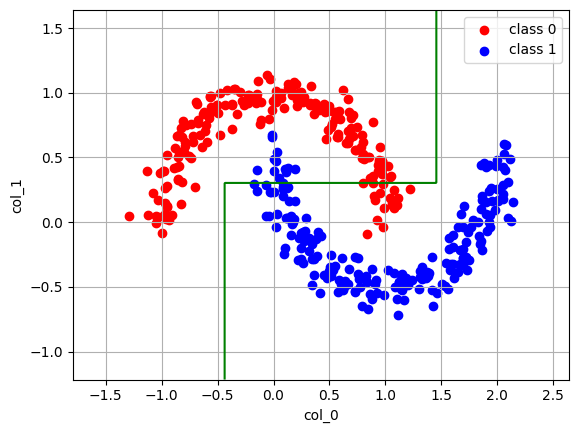

In [ ]:
# Crear una malla de puntos para graficar la línea de decisión
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la línea de decisión de la regresión logística
plt.contour(xx, yy, Z, levels=[0.5], colors='green')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="class 1")
plt.xlabel("col_0"); plt.ylabel("col_1");
plt.legend()
plt.grid()
print ("SCORE %.2f"%dt.score(X,y))

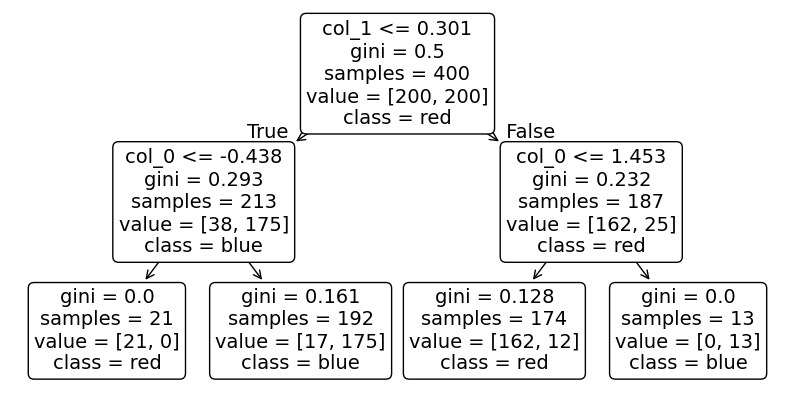

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(dt, feature_names=["col_0", "col_1"], class_names=["red", "blue"], rounded=True);

SCORE 0.99


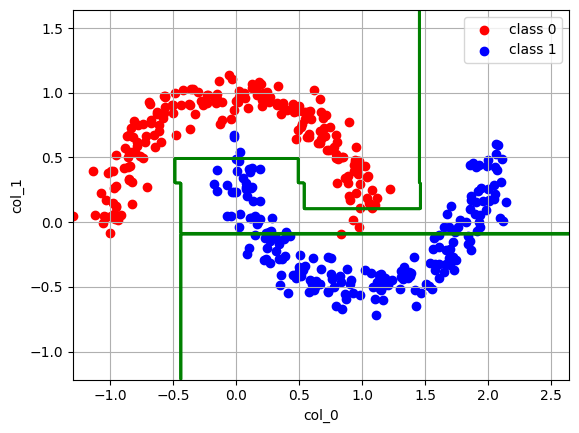

In [ ]:
dt1 = DecisionTreeClassifier(max_depth=6)
dt1.fit(X,y)


# Crear una malla de puntos para graficar la línea de decisión
x_min, x_max = X[:, 0].min() , X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = dt1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la línea de decisión de la regresión logística
plt.contour(xx, yy, Z, colors='green')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="class 1")
plt.xlabel("col_0"); plt.ylabel("col_1");
plt.legend()
plt.grid()
print ("SCORE %.2f"%dt1.score(X,y))

In [ ]:
y_preds = dt1.predict(X)
dt1.score(X,y)

0.99

* samples: nb de puntos de datos en la división
* value: nb muestras de cada clase en la división
* class: clase asignada a la división (la clase mayoritaria en valor)

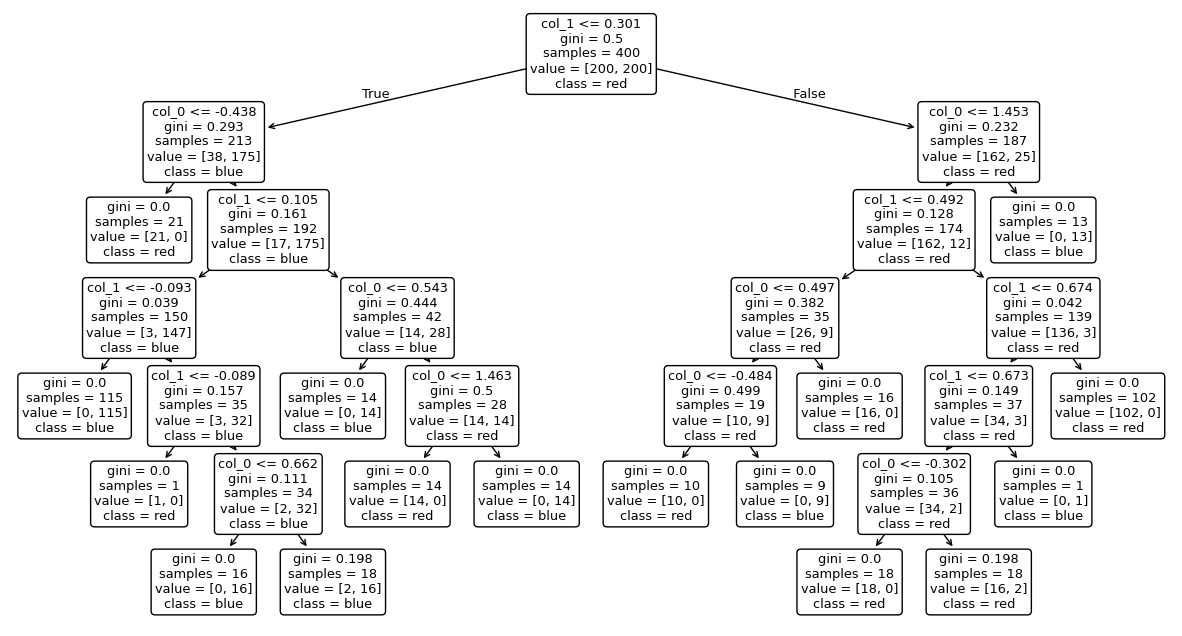

In [ ]:
plt.figure(figsize=(15,8))
plot_tree(dt1, feature_names=["col_0", "col_1"], class_names=["red", "blue"], rounded=True);

In [ ]:
X,y = make_circles(400, noise=0.05)

SCORE 0.69


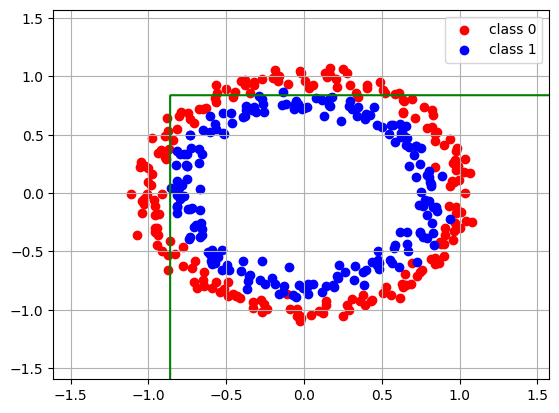

In [ ]:
dt = DecisionTreeClassifier(max_depth=2);
dt.fit(X,y)
# Crear una malla de puntos para graficar la línea de decisión
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la línea de decisión de la regresión logística
plt.contour(xx, yy, Z, levels=[0.5], colors='green')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="class 1")
plt.legend()
plt.grid()
print ("SCORE %.2f"%dt.score(X,y))

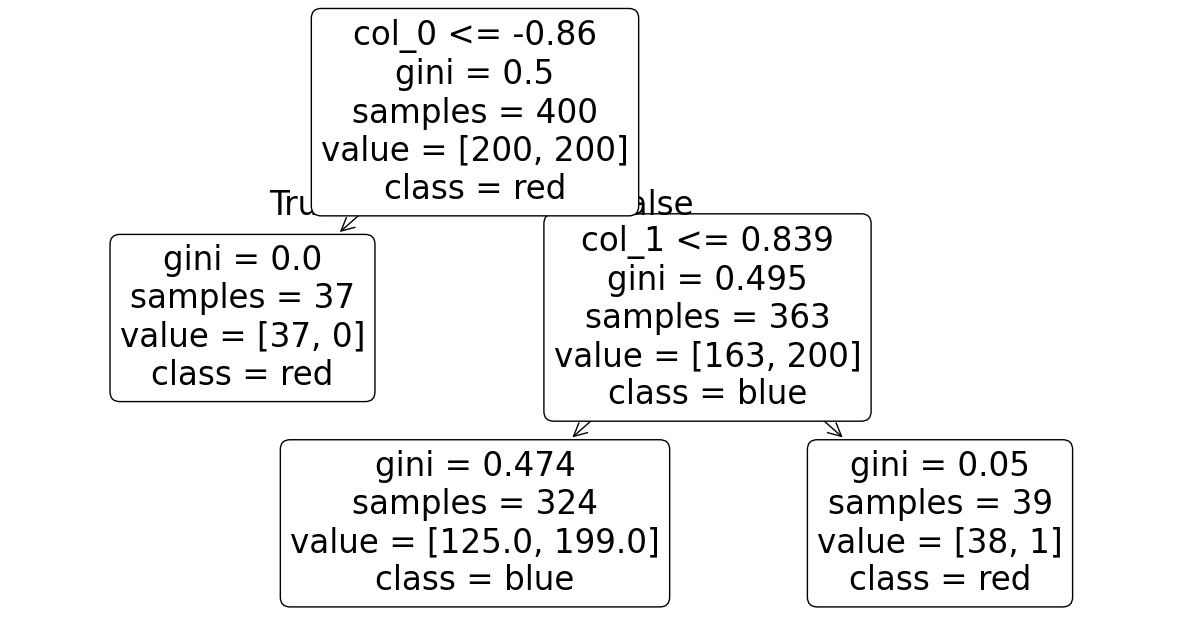

In [ ]:
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=["col_0", "col_1"], class_names=["red", "blue"], rounded=True);

In [ ]:
y_preds = dt.predict(X)
dt.score(X,y)

0.685

# Random Forest (Bosques aleatorios)

0.8525
SCORE 0.85


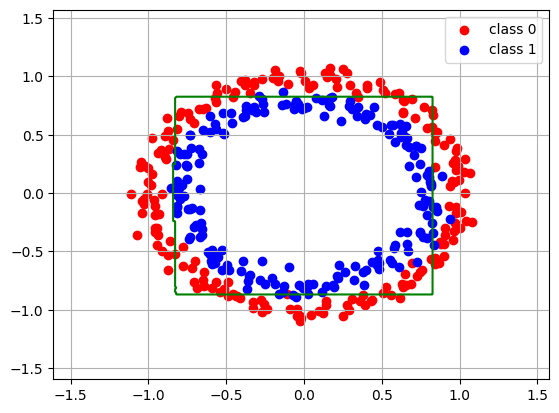

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=4)
rf.fit(X,y)
print (rf.score(X,y))


# Crear una malla de puntos para graficar la línea de decisión
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la línea de decisión de la regresión logística
plt.contour(xx, yy, Z, levels=[0.5], colors='green')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="class 1")
plt.legend()
plt.grid()
print ("SCORE %.2f"%rf.score(X,y))

* Ensayemos con un arbol de decisión

In [ ]:
from sklearn.datasets import make_circles
X,y = make_circles(400, noise=0.05)

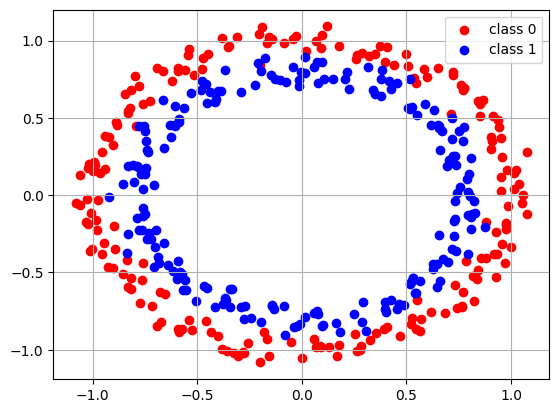

In [ ]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red", label="class 0")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue", label="class 1")
plt.legend();
plt.grid();

0.9925


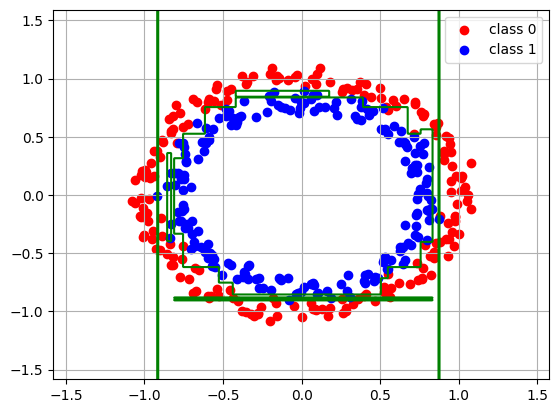

In [ ]:
dt = DecisionTreeClassifier(max_depth=10);
dt.fit(X,y)

# Crear una malla de puntos para graficar la línea de decisión
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la línea de decisión de la regresión logística
plt.contour(xx, yy, Z, levels=[0.5], colors='green')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="class 1")
plt.legend()
plt.grid()

print (dt.score(X,y))

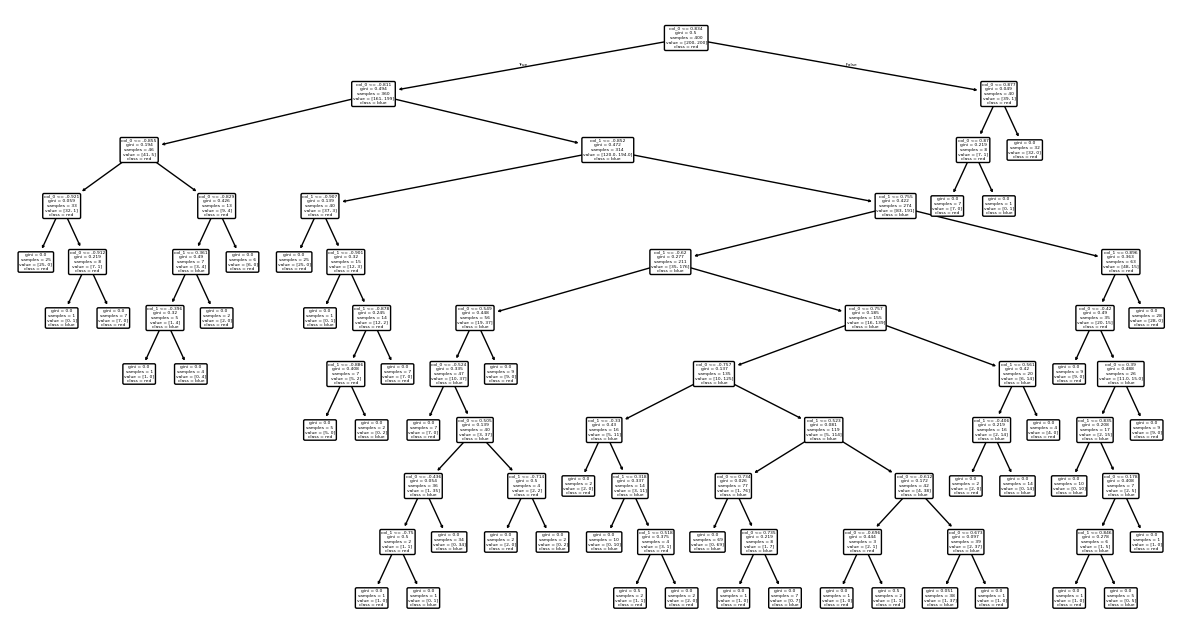

In [ ]:
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=["col_0", "col_1"], class_names=["red", "blue"], rounded=True);

SCORE 0.99


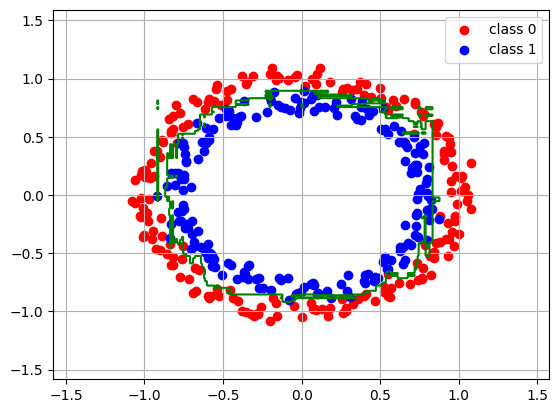

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=100)
rf.fit(X,y)

# Crear una malla de puntos para graficar la línea de decisión
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la línea de decisión de la regresión logística
plt.contour(xx, yy, Z, levels=[0.5], colors='green')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="class 1")
plt.legend()
plt.grid()
print ("SCORE %.2f"%rf.score(X,y))

## Naive Bayes

SCORE 0.97


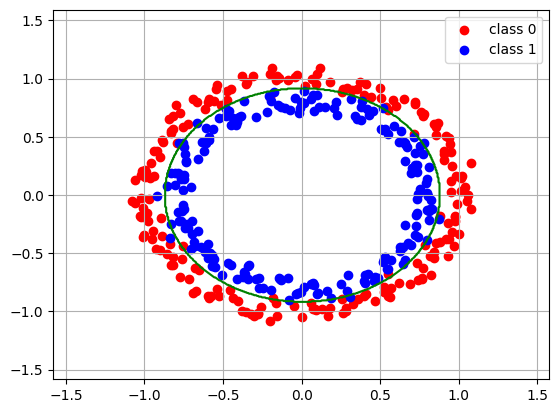

In [ ]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X,y)

# Crear una malla de puntos para graficar la línea de decisión
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = gb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la línea de decisión de la regresión logística
plt.contour(xx, yy, Z, levels=[0.5], colors='green')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="class 1")
plt.legend()
plt.grid()
print ("SCORE %.2f"%gb.score(X,y))

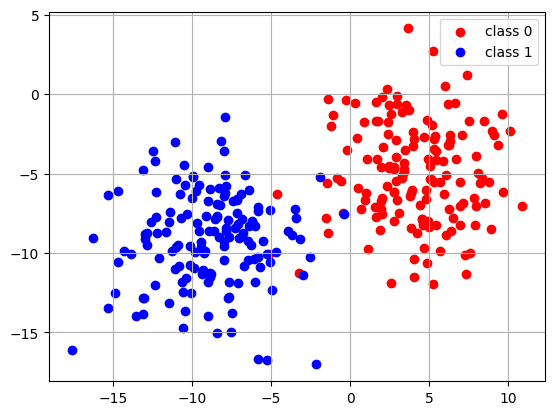

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(300, centers=2, cluster_std=3)


plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red", label="class 0")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue", label="class 1")
#plt.scatter(X[y==2][:,0], X[y==2][:,1], color="green", label="class 2")
plt.legend();
plt.grid();

SCORE 0.98


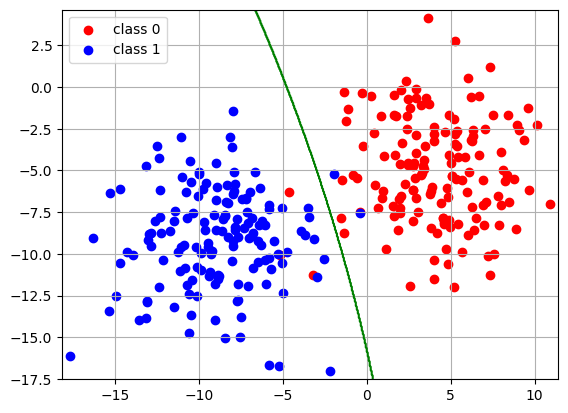

In [ ]:
gb = GaussianNB()
gb.fit(X,y)


# Crear una malla de puntos para graficar la línea de decisión
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = gb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la línea de decisión de la regresión logística
plt.contour(xx, yy, Z, levels=[0.5], colors='green')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="class 1")
plt.legend()
plt.grid()

print ("SCORE %.2f"%gb.score(X,y))

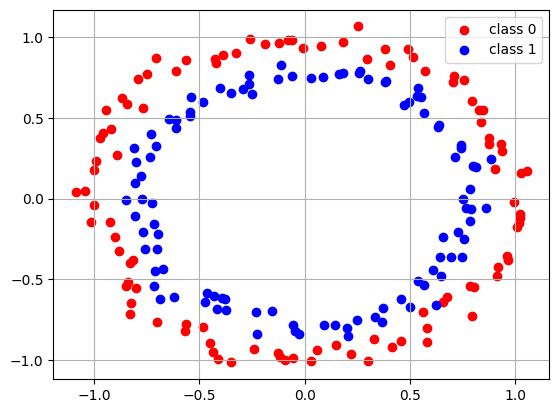

In [ ]:
X,y = make_circles(200, noise=.05)
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red", label="class 0")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue", label="class 1")
plt.legend();
plt.grid();

SCORE 0.49
SCORE 0.49


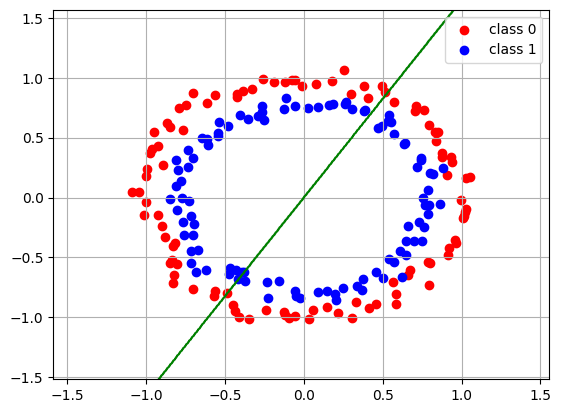

In [ ]:
lr = LogisticRegression()
lr.fit(X,y)
print ("SCORE %.2f"%lr.score(X,y))
# Crear una malla de puntos para graficar la línea de decisión
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la línea de decisión de la regresión logística
plt.contour(xx, yy, Z, levels=[0.5], colors='green')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="class 1")
plt.legend()
plt.grid()
print ("SCORE %.2f"%lr.score(X,y))

## Creamos una nueva variable

In [ ]:
X,y = make_circles(300, noise=.05)
X = np.vstack((X.T,X[:,0]**2+X[:,1]**2)).T
X.shape

(300, 3)

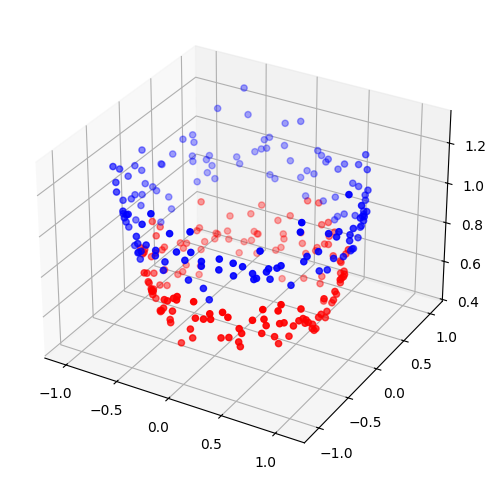

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0][y==0], X[:,1][y==0],X[:,2][y==0], color="blue")
ax.scatter(X[:,0][y==1], X[:,1][y==1],X[:,2][y==1], color="red")
ax.scatter(X[:,0][y==2], X[:,1][y==2],X[:,2][y==2], color="green")

In [ ]:
lr = LogisticRegression()
lr.fit(X,y)
print ("SCORE %.2f"%lr.score(X,y))

SCORE 0.98
